# **Predicción de Precios de Acciones de NVIDIA (NVDA) con Deep Learning**

### **Proyecto Final Samsung Innovation Campus – Módulo de Inteligencia Artificial (EC04)**

Integrantes:

- Ulices Chingo
- Sofia Feijóo
- Brayan Maisincho
- Esteban Quiña
- Alan Palma


In [1]:
# Librerías básicas para cómputo numérico y manejo de datos
import numpy as np
import pandas as pd
import warnings
import itertools

# Librerías para visualización
import matplotlib.pyplot as plt

# Librerías para análisis estadístico y series temporales
import statsmodels.api as sm

# Librerías de scikit-learn para preprocesamiento y evaluación
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Módulos propios del proyecto
from src.model_LSTM import model_LSTM
from src.indicators import agregar_indicadores_tecnicos

# LSTM

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
# Configuracion para el modelo
ventana = 60
epocas = 20
batch_size = 32

In [4]:

# Crarga de datos y preprocesamiento
df = pd.read_csv("valid_csv_concatenado_invertido_con_60min.csv", parse_dates=['timestamp'])

# Filtrar fechas de interés
df = df[(df['timestamp'] >= '2023-01-01') & (df['timestamp'] <= '2023-06-30')]

# Agrgar indicadores técnicos
df = agregar_indicadores_tecnicos(df)

# Eliminar filas con NaN generados por los indicadores (los primeros 26 periodos del MACD/RSI)
df.dropna(inplace=True)

# Seleccionar FEATURES (X) y TARGET (y): se usara Close, RSI y MACD para predecir.
features = ['close', 'rsi', 'macd']
target = 'close'

data = df[features].values

# Scalamiento multivariado: 3 columnas (close, rsi, macd)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Para poder invertir la predicción del precio después, necesitamos un scaler solo para el precio (columna target)
scaler_precio = MinMaxScaler()
scaler_precio.fit(df[[target]]) # Ajustamos solo a la columna target para uso posterior


# ====== Split ======
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - ventana:]

# Crear secuencias multivariadas
def crear_secuencias_multivariadas(data, ventana, target_col_idx=0):
    X, y = [], []
    for i in range(ventana, len(data)):
        # X: Todas las columnas (precio, rsi, macd) de los 'ventana' días anteriores
        X.append(data[i - ventana:i, :]) 
        
        # y: Solo la columna del precio (target_col_idx) del día actual 'i'
        y.append(data[i, target_col_idx]) 
        
    return np.array(X), np.array(y)

# Usar la nueva función
# target_col_idx=0 porque 'close' es la primera columna en nuestra lista ['close', 'rsi', 'macd']
X, y = crear_secuencias_multivariadas(scaled_data, ventana, target_col_idx=0)

# Split Train/Test (Mantenemos tu lógica 80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Forma de X_train: {X_train.shape}") 
# Debería ser (N muestras, 60 ventana, 3 features) -> Antes era (N, 60, 1)



Forma de X_train: (1526, 60, 3)


In [5]:
# Usar model_LSTM
window = 60
batch_size = 32
epochs = 50

# Llamar a la función model_LSTM con los parámetros definidos
model = model_LSTM(window_size=window, batch_size=batch_size, epochs=epochs, X_train=X_train, y_train=y_train)

Epoch 1/50


/Users/equina/Documents/SIC/Hackathon/HACKATON-Prediccion-de-Precios-de-Acciones-de-NVIDIA-mediante-Redes-Neuronales-/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0216
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.8616e-04
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9448e-04
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4310e-04
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3871e-04
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3661e-04
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1959e-04
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1624e-04
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0080e-04
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2056e-04
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9592e-04
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8685e-04
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8712e-04
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7673e-04
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6m

In [7]:
# Evaluar el modelo LSTM
predictions_LSTM = model.predict(X_test)
# Usar el scaler ajustado solo para el precio (scaler_precio) al invertir las predicciones
predictions_inverse_LSTM = scaler_precio.inverse_transform(predictions_LSTM.reshape(-1, 1))
y_test_inverse_LSTM = scaler_precio.inverse_transform(y_test.reshape(-1, 1))

# Metricas
mae = mean_absolute_error(y_test_inverse_LSTM, predictions_inverse_LSTM)
mse = mean_squared_error(y_test_inverse_LSTM, predictions_inverse_LSTM)
mape = np.mean(np.abs((y_test_inverse_LSTM - predictions_inverse_LSTM) / y_test_inverse_LSTM)) * 100

print(f"LSTM mean absolute error: {mae}")
print(f"LSTM mean squared error: {mse}")
print(f"LSTM mean absolute percentage error: {mape}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
LSTM mean absolute error: 1.3806836564947798
LSTM mean squared error: 2.7299203384334976
LSTM mean absolute percentage error: 3.3998731412117325


Iniciando Validación Cruzada con 5 folds...
--------------------------------------------------
Epoch 1/20


/Users/equina/Documents/SIC/Hackathon/HACKATON-Prediccion-de-Precios-de-Acciones-de-NVIDIA-mediante-Redes-Neuronales-/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0097  
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0035
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0016
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.6033e-04
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6961e-04
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3428e-04
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0503e-04
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4481e-04
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3139e-04 
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2694e-04 
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2224e-04
Epoch 13/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1627e-04 
Epoch 14/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3079e-04 
Epoch 15/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

/Users/equina/Documents/SIC/Hackathon/HACKATON-Prediccion-de-Precios-de-Acciones-de-NVIDIA-mediante-Redes-Neuronales-/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0028  
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.2245e-04
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6502e-04
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2118e-04
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1207e-04
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.9869e-05
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8737e-05
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.5112e-05
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.2600e-05
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.8359e-05
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.7301e-05
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9981e-05
Epoch 13/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4757e-05
Epoch 14/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.9800e-05
Epoch 15/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 

/Users/equina/Documents/SIC/Hackathon/HACKATON-Prediccion-de-Precios-de-Acciones-de-NVIDIA-mediante-Redes-Neuronales-/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0194 
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0032
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8119e-04
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3230e-04
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0920e-04
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.6266e-05
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.0056e-05
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.6981e-05
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.6506e-05
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8.4334e-05
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.9477e-05
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.8894e-05
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7.6840e-05
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.3868e-05
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/s

/Users/equina/Documents/SIC/Hackathon/HACKATON-Prediccion-de-Precios-de-Acciones-de-NVIDIA-mediante-Redes-Neuronales-/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0215
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0012
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.0020e-04
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3168e-04
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2161e-04
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0725e-04
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0334e-04
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.8588e-05
Epoch 9/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3363e-05
Epoch 10/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.1725e-05
Epoch 11/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.5318e-05
Epoch 12/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7877e-05
Epoch 13/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.7507e-05
Epoch 14/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.4094e-05
Epoch 15/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

/Users/equina/Documents/SIC/Hackathon/HACKATON-Prediccion-de-Precios-de-Acciones-de-NVIDIA-mediante-Redes-Neuronales-/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0158
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.6203e-04
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5681e-04
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3734e-04
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.2368e-04
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1182e-04
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9383e-04
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9139e-04
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7331e-04
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7196e-04
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7630e-04
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6030e-04
Epoch 13/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5708e-04
Epoch 14/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6099e-04
Epoch 15/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

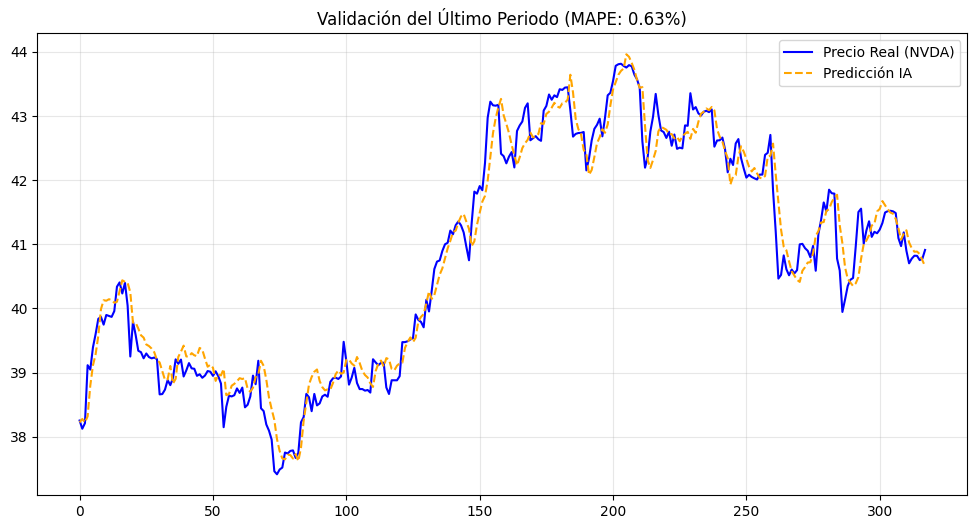

In [8]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# ==============================================================================
# 🚀 DÍA 2: VALIDACIÓN CRUZADA ROBUSTA (Time Series Split)
# ==============================================================================

# Configuración de la validación
# 5 Splits significa que entrenaremos y probaremos 5 veces moviendo la ventana hacia adelante.
tscv = TimeSeriesSplit(n_splits=5)

errores_mape = []
fold = 1

print(f"Iniciando Validación Cruzada con {tscv.get_n_splits()} folds...")
print("-" * 50)

# El bucle recorre los diferentes cortes de tiempo
for train_index, test_index in tscv.split(X):
    # 1. Separar datos para este fold
    X_train_cv, X_test_cv = X[train_index], X[test_index]
    y_train_cv, y_test_cv = y[train_index], y[test_index]
    
    # 2. Instanciar el modelo (IMPORTANTE: Re-iniciar el modelo en cada fold)
    # Asegúrate de que tu función model_LSTM acepte input_shape dinámico
    # input_shape=(X_train_cv.shape[1], X_train_cv.shape[2]) -> (60, 3)
    model = model_LSTM(
        window_size=ventana, 
        batch_size=32, 
        epochs=20, # Menos épocas por fold para agilizar pruebas
        X_train=X_train_cv, 
        y_train=y_train_cv
    )
    
    # 3. Entrenar (El fit ya suele estar dentro de tu clase model_LSTM o lo llamamos aquí)
    # Si tu clase model_LSTM ya hace .fit() adentro, omite esta línea. 
    # Si model_LSTM solo devuelve la arquitectura, descomenta abajo:
    model.fit(X_train_cv, y_train_cv, epochs=10, batch_size=32, verbose=0, shuffle=False)
    
    # 4. Predecir
    predictions = model.predict(X_test_cv, verbose=0)
    
    # 5. Invertir Escala (Truco: Usamos el scaler_precio que creamos en el Día 1)
    # El scaler original 'scaler' espera 3 columnas. Nosotros solo tenemos 1 (precio predicho).
    # Por eso usamos scaler_precio que solo se ajustó a 'close'.
    y_test_inverse = scaler_precio.inverse_transform(y_test_cv.reshape(-1, 1))
    predictions_inverse = scaler_precio.inverse_transform(predictions.reshape(-1, 1))
    
    # 6. Calcular Error
    mape = mean_absolute_percentage_error(y_test_inverse, predictions_inverse) * 100
    errores_mape.append(mape)
    
    print(f"Fold {fold}: MAPE = {mape:.2f}% | Train Size: {len(X_train_cv)} | Test Size: {len(X_test_cv)}")
    fold += 1

# ==============================================================================
# 📊 RESULTADOS FINALES DEL DÍA 2
# ==============================================================================
promedio_mape = np.mean(errores_mape)
std_mape = np.std(errores_mape)

print("-" * 50)
print(f"📈 MAPE Promedio: {promedio_mape:.2f}%")
print(f"📉 Desviación Estándar: {std_mape:.2f}%")
print("-" * 50)

if promedio_mape < 2.5:
    print("✅ RESULTADO EXCELENTE: El modelo es robusto y cumple el objetivo para el Hackathon.")
else:
    print("⚠️ AJUSTE NECESARIO: Intenta aumentar épocas o revisar los indicadores.")

# Visualizar el último Fold para el reporte
plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='Precio Real (NVDA)', color='blue')
plt.plot(predictions_inverse, label='Predicción IA', color='orange', linestyle='--')
plt.title(f'Validación del Último Periodo (MAPE: {errores_mape[-1]:.2f}%)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()